## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [58]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

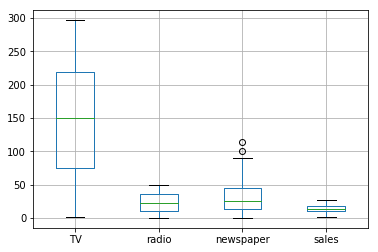

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
#plt.scatter(df)

C:\adiewux\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D321C1EB70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D3222CB588>]], dtype=object)

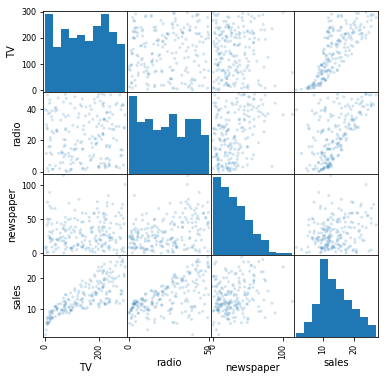

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6))

Which of the variables seem correlated with one another? Which don't? Explain your answer

Advertising dollars spent on TV seems most correlated with sales, thereby implying that spending more on TV advertisement corresponds to higher sales compared to spending on radio or newspaper advertisement (although we have to be wary that correlation is not causation). The advertising dollars on each of the 3 different medias are not correlated to each other. This could be because the decision to spend advertising on TV is independent of that spent on newspaper and radio.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [59]:
y = df[['sales']]

In [63]:
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2


b) Set X to be just the features described above in df

In [35]:
len(X)

200

In [9]:
X = df[['TV', 'radio', 'newspaper']]

In [34]:
len(df)

200

c) Randomly split data into training and testing - 80% training, 20% testing.

In [36]:
size = 200
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

In [37]:
type(y_test)

pandas.core.frame.DataFrame

d) Train model on training data, and make predictions on testing data

In [40]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
import numpy as np
SSreg = np.mean((regr.predict(X_test) - y_test) ** 2)
SStot =  np.mean((y_test - np.mean(y_test)) ** 2)
print("R^2: %.2f" % (1 - SSreg/SStot))

R^2: 0.90


The R^2 of 0.90 in the testing data is good because indicates that the predictive model is able to explain 90% of the variance in the testing data. A perfect model that fully accurately predicts in the testing data would have a R^2 of 1 so a R^2 of 0.90 in the testing data is pretty good. It is worth noting that while a high R^2 in the testing data may be good, a high R^2 in the training data may be bad because it may indicate overfitting in the training data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

In [39]:
plt.scatter(y_test,)

TypeError: scatter() missing 1 required positional argument: 'y'

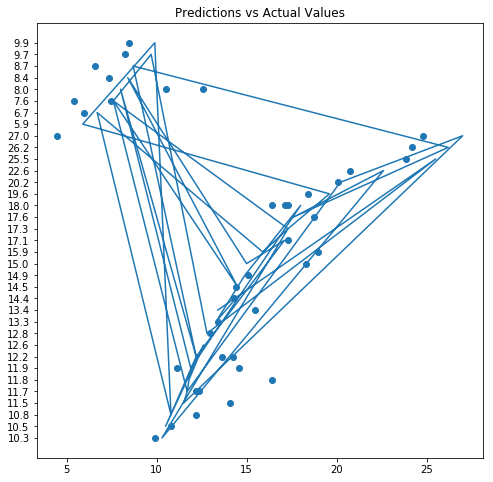

In [75]:
plt.title('Predictions vs Actual Values')
plt.rcParams['figure.figsize'] = 10,10
plt.scatter(regr.predict(X_test), y_test)
plt.plot(y_test,y_test)



In [68]:
y_test.values

array([[ 14.4],
       [ 13.3],
       [ 14.9],
       [ 18. ],
       [ 11.9],
       [ 11.9],
       [  8. ],
       [ 12.2],
       [ 17.1],
       [ 15. ],
       [  8.4],
       [ 14.5],
       [  7.6],
       [ 11.7],
       [ 11.5],
       [ 27. ],
       [ 20.2],
       [ 11.7],
       [ 11.8],
       [ 12.6],
       [ 10.5],
       [ 12.2],
       [  8.7],
       [ 26.2],
       [ 17.6],
       [ 22.6],
       [ 10.3],
       [ 17.3],
       [ 15.9],
       [  6.7],
       [ 10.8],
       [  9.9],
       [  5.9],
       [ 19.6],
       [ 17.3],
       [  7.6],
       [  9.7],
       [ 12.8],
       [ 25.5],
       [ 13.4]])

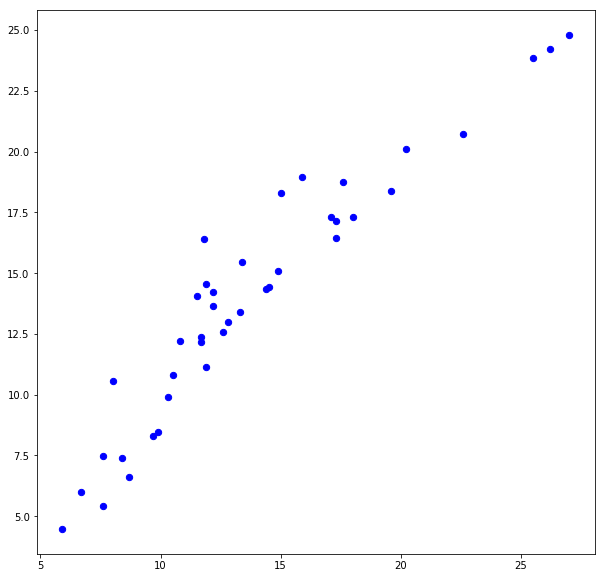

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test.values,regr.predict(X_test), s=40, c='b',)
plt.plot()


It can be seen that it does not appear to be that good a model because there are quite a few points either side of the actual values. If the model is good, most of the points should fall on or be near the 45 degree line shown above since that line implies predictions = actual values.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [14]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 0.0472521   0.179922   -0.00094408]]


The coefficicents from the linear regression tells us that an unit increase in TV advertising expenditure (the first feature in X) increases sales by 0.0472521, an unit increase in radio advertising expenditure (the second feature in X) increases sales by 0.179922, while an unit increase in newspaper advertising expenditure (the third feature in X) decreases sales by 0.00094408. From the output, it can be seen that the feature radio advertising expdentiure is the most significant.

Before making conclusions however, a few things should be checked. Firstly, we should check if there is any interaction or dependence between the features and secondly, in order to compare coefficients we should check if the features have been normalized to have the same scale.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [15]:
# Type your answer here. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

SyntaxError: invalid syntax (<ipython-input-16-9574d07616dc>, line 39)

In [ ]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.